# Web Scraping and Analysis

Here, we use library known as  'BeautifulSoup' to collect data from the web.We use Skytrax to collect reviews
related to British Airways and the airline staff.

In [183]:
#pip install textblob

In [184]:
#pip install wordcloud

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import warnings 
warnings.filterwarnings("ignore")

In [186]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews=[]

for i in range(1,pages + 1):
    print(f"Scraping page {i}")

#Create A URL to collect links
    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#collect HTML data from this page
    response=requests.get(url)
        
#parse content
    content=response.content
    parsed_content=BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())

    print(f"-----: {len(reviews)} total reviews")





Scraping page 1
-----: 100 total reviews
Scraping page 2
-----: 200 total reviews
Scraping page 3
-----: 300 total reviews
Scraping page 4
-----: 400 total reviews
Scraping page 5
-----: 500 total reviews
Scraping page 6
-----: 600 total reviews
Scraping page 7
-----: 700 total reviews
Scraping page 8
-----: 800 total reviews
Scraping page 9
-----: 900 total reviews
Scraping page 10
-----: 1000 total reviews


In [187]:
pd.set_option('display.max_colwidth',1000)
df=pd.DataFrame()
df["Reviews"]=reviews
df.head()

,Reviews
0,"✅ Trip Verified | London Heathrow to Male In new business class. BA continues to get its mojo back starting with a classy lounge serving innovative, and interesting, quality pre-flight food (beetroot scotch eggs?). Excellent wine (Whispering Angel). Presentation of on-board food has always been a bit hit and miss with BA, but on this occasion it was tasty and OK. Friendly and efficient on board crew. Smile, treat them respectfully, and as equals. On time flight and early arrival. Only awarding a 9 because we were bussed from A-C gates, otherwise a really enjoyable experience."
1,Not Verified | Very good flight following an equally good flight to Rome. Good food (especially on an evening flight) and aircraft early both ways. Just what short haul should be.
2,Not Verified | An hour's delay due to late arrival of the incoming aircraft. The captain was a particularly able communicator who kept us in touch with the situation. We got freebie upgrades to emergency exit seats from a friendly member of the crew. In the end we were only 30 minutes behind schedule in a relatively comfortable elderly plane. Pretty stress free.
3,"✅ Trip Verified | I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t look on Manchester airports historic flight website to confirm the cancellation, they won’t put you through to a supervisor in fact they do very little but apologise for how little they do."
4,"✅ Trip Verified | British airways lost bags in LHR then found them. Sent to Cologne where it sat for two days before they told me, but no one was there to give it to me. I spent 10 days in Europe without a bag, bought clothes. BA refused to reimburse me. They closed the case 10 days after i returned to the states when my bag showed up at my front door. They wont let you talk to management, they say they email mail you but they don't then you call customer service. they say they will escalate it but you will never know. they don't update the claims or the forms."


In [188]:
df.tail()

,Reviews
995,"✅ Trip Verified | London to Shanghai. The Concorde room in Heathrow Terminal 5 was amazing, the dinner experience was great and the food was delicious. However, the First galleries was overcrowded and the buffet was bad. On the plane, the crew was very friendly and nice. Dinner service was finished 1 hour after take off, the food was okay. Bed was made after dinner and it was very comfortable, perhaps the best I have had. The entertainment system was not as good as other airlines like Qatar Airlines and Emirates. Overall, the journey was great."
996,"Not Verified | I have often flown British Airways and have considered them a good airline. However, their customer service has fallen to such a level that I must say it is terrible. If you have no problems this is a good airline. If you have any problems you will not be able to get any help. I recently flew to London from Chicago. They erroneously cancelled my seats although I had checked in over 5 hours before he flight. They then downgraded my seat and put me on the plane. They then lost my luggage for 15 days. These things happen but customer service was impossible to use. When you call, you almost always get a message that says they are busy and the phone automatically hangs up. If you send in a request for help via the website you will get only a robo generated message that they will get back to you. They do not. You can't find out the status of your inquiry and only get a looping set of computer messages. Do not take this airline if customer service may be important to you."
997,"Not Verified | Good morning. I would like to write a review for British Airways. It took me a while to write this review as I it took me a while to get over what happened to me. But I feel that the way British Airways behaved needs a review for their valiant efforts. Last year I went with my 9 year old son and my 80 year old friend to New Orleans from London on the holiday of a life time. I was pregnant at the time. The baby died while I was on holiday there and I was in a turmoil of emotions. Regardless I tried to make the holiday a positive experience for my son and friend and carried on, all the while just wanting to go home as treatment needed to take place in England. Somehow I missed the flight back. I have no excuse for this. When I realised I was in a complete state. I had a break down. I rang BA and sobbed down the phone. They were beyond amazing! They arranged a flight back home the same day without any extra cost. We all sat together and we were able to fly home that da..."
998,"✅ Trip Verified | My flight was cancelled 3 days in a row. Was flying out on Thursday and finally after days and hours of arguing with BA, I got a flight out Saturday night with Swiss Air. They on the other hand actually fly and on time. Everything about the customer service, customer relations has been terrible, hours of waiting on the phone, no answers on email. My other flights with BA this year has been delayed too. They have for two months promised to reimburse me on all my expenses and to pay the penalty fine of 700$. First 10 days, then 21 bank days and now we are way passed anything else that they have not transferred the money yet. So far nothing and the complaint has been turned over to CAA and the Danish Aviation Authority."
999,"✅ Trip Verified | Hong Kong to Copenhagen via London. The whole experience is a nightmare to me and my wife. My wife lost her luggage ever since the first day of our journey on 1st August because our two pieces of luggage were left in Heathrow Airport by BA staff when we took the transit flight from the UK to Copenhagen. We went to Menzies in CPH and they filed a repor. We stated in the missing report that if the luggage was found, they should be sent to our air b&b house in Marstal in CPH on or before 3rd August or deliver to the hotel we stayed in CPH if they were found on 4th August. On 2nd August, we found that the updated status of our missing luggage in the 

# Convert data into a csv file

In [190]:
df.to_csv("BA_reviews.csv")

# Exploratory Data Analysis

In [192]:
#Open CSV file
#with open('BA_reviews.csv',mode='r') as file:
#df=pd.read_csv("BA_reviews.csv",delimiter='|')
df['Reviews']=df['Reviews'].str.split('|').str[1]

In [193]:
#df =pd.DataFrame()
df.head()

,Reviews
0,"London Heathrow to Male In new business class. BA continues to get its mojo back starting with a classy lounge serving innovative, and interesting, quality pre-flight food (beetroot scotch eggs?). Excellent wine (Whispering Angel). Presentation of on-board food has always been a bit hit and miss with BA, but on this occasion it was tasty and OK. Friendly and efficient on board crew. Smile, treat them respectfully, and as equals. On time flight and early arrival. Only awarding a 9 because we were bussed from A-C gates, otherwise a really enjoyable experience."
1,Very good flight following an equally good flight to Rome. Good food (especially on an evening flight) and aircraft early both ways. Just what short haul should be.
2,An hour's delay due to late arrival of the incoming aircraft. The captain was a particularly able communicator who kept us in touch with the situation. We got freebie upgrades to emergency exit seats from a friendly member of the crew. In the end we were only 30 minutes behind schedule in a relatively comfortable elderly plane. Pretty stress free.
3,"I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t look on Manchester airports historic flight website to confirm the cancellation, they won’t put you through to a supervisor in fact they do very little but apologise for how little they do."
4,"British airways lost bags in LHR then found them. Sent to Cologne where it sat for two days before they told me, but no one was there to give it to me. I spent 10 days in Europe without a bag, bought clothes. BA refused to reimburse me. They closed the case 10 days after i returned to the states when my bag showed up at my front door. They wont let you talk to management, they say they email mail you but they don't then you call customer service. they say they will escalate it but you will never know. they don't update the claims or the forms."


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [195]:
#Pandas use library TextBlob for sentiment analysis
#Function to get sentiment
def get_sentiment(text):
     blob=TextBlob(text)
     return blob.sentiment.polarity
     

In [196]:
df['sentiment']=df['Reviews'].apply(get_sentiment)

In [197]:
df.head()

,Reviews,sentiment
0,"London Heathrow to Male In new business class. BA continues to get its mojo back starting with a classy lounge serving innovative, and interesting, quality pre-flight food (beetroot scotch eggs?). Excellent wine (Whispering Angel). Presentation of on-board food has always been a bit hit and miss with BA, but on this occasion it was tasty and OK. Friendly and efficient on board crew. Smile, treat them respectfully, and as equals. On time flight and early arrival. Only awarding a 9 because we were bussed from A-C gates, otherwise a really enjoyable experience.",0.300758
1,Very good flight following an equally good flight to Rome. Good food (especially on an evening flight) and aircraft early both ways. Just what short haul should be.,0.344286
2,An hour's delay due to late arrival of the incoming aircraft. The captain was a particularly able communicator who kept us in touch with the situation. We got freebie upgrades to emergency exit seats from a friendly member of the crew. In the end we were only 30 minutes behind schedule in a relatively comfortable elderly plane. Pretty stress free.,0.122222
3,"I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t look on Manchester airports historic flight website to confirm the cancellation, they won’t put you through to a supervisor in fact they do very little but apologise for how little they do.",0.078906
4,"British airways lost bags in LHR then found them. Sent to Cologne where it sat for two days before they told me, but no one was there to give it to me. I spent 10 days in Europe without a bag, bought clothes. BA refused to reimburse me. They closed the case 10 days after i returned to the states when my bag showed up at my front door. They wont let you talk to management, they say they email mail you but they don't then you call customer service. they say they will escalate it but you will never know. they don't update the claims or the forms.",-0.066667


In [198]:
#Make all data to  single sentence
text=" ".join(df['Reviews'])

In [199]:
#Generate word cloud
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)

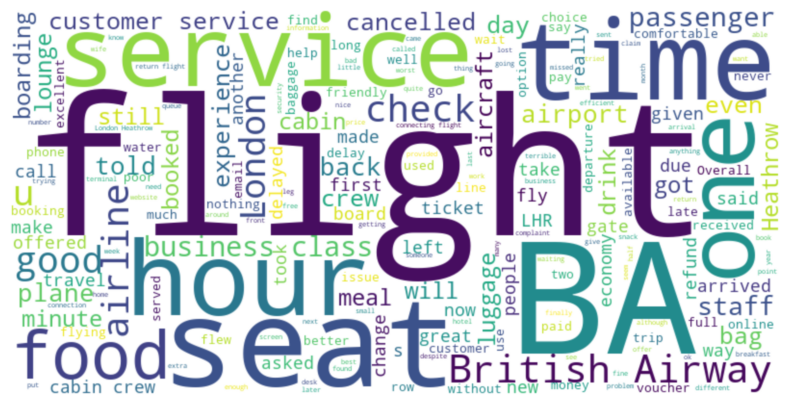

In [200]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bicubic')
plt.axis('off')
plt.show()

<Axes: xlabel='sentiment', ylabel='Count'>

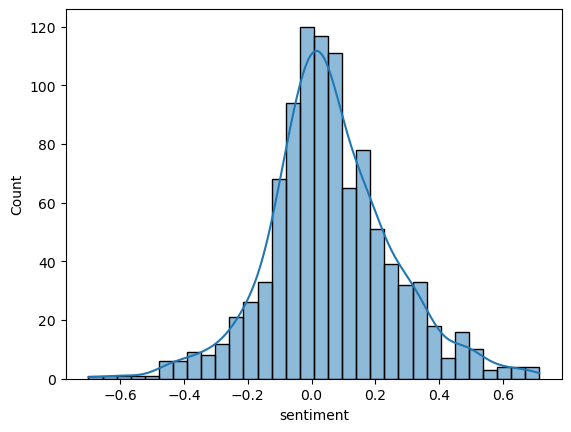

In [201]:
sns.histplot(x='sentiment',data=df,kde=True)

In [202]:
rows=1000
sentiment_result=[]
for i in range(rows):
    result=df.iloc[i,1]
    if result <0:
        sentiment_result.append("Negetive")
    elif result == 0:
        sentiment_result.append("Neutral")
    elif result>0:
        sentiment_result.append("Positive")



In [203]:
df['Sentiment_Category']=sentiment_result

In [204]:
df.head()

,Reviews,sentiment,Sentiment_Category
0,"London Heathrow to Male In new business class. BA continues to get its mojo back starting with a classy lounge serving innovative, and interesting, quality pre-flight food (beetroot scotch eggs?). Excellent wine (Whispering Angel). Presentation of on-board food has always been a bit hit and miss with BA, but on this occasion it was tasty and OK. Friendly and efficient on board crew. Smile, treat them respectfully, and as equals. On time flight and early arrival. Only awarding a 9 because we were bussed from A-C gates, otherwise a really enjoyable experience.",0.300758,Positive
1,Very good flight following an equally good flight to Rome. Good food (especially on an evening flight) and aircraft early both ways. Just what short haul should be.,0.344286,Positive
2,An hour's delay due to late arrival of the incoming aircraft. The captain was a particularly able communicator who kept us in touch with the situation. We got freebie upgrades to emergency exit seats from a friendly member of the crew. In the end we were only 30 minutes behind schedule in a relatively comfortable elderly plane. Pretty stress free.,0.122222,Positive
3,"I booked through BA because Loganair don’t have representatives in Manchester airport. Loganair cancelled the flight but someone at BA marked the flight as delayed by 52 minutes. I’ve spent over 70 days chasing BA’s complaints department who are at best totally ineffective. They won’t put you through to the people dealing with the claim (apparently they don’t have the facility to do so!), they won’t phone Loganair, they won’t look on Manchester airports historic flight website to confirm the cancellation, they won’t put you through to a supervisor in fact they do very little but apologise for how little they do.",0.078906,Positive
4,"British airways lost bags in LHR then found them. Sent to Cologne where it sat for two days before they told me, but no one was there to give it to me. I spent 10 days in Europe without a bag, bought clothes. BA refused to reimburse me. They closed the case 10 days after i returned to the states when my bag showed up at my front door. They wont let you talk to management, they say they email mail you but they don't then you call customer service. they say they will escalate it but you will never know. they don't update the claims or the forms.",-0.066667,Negetive


In [205]:
series=pd.Series(sentiment_result)

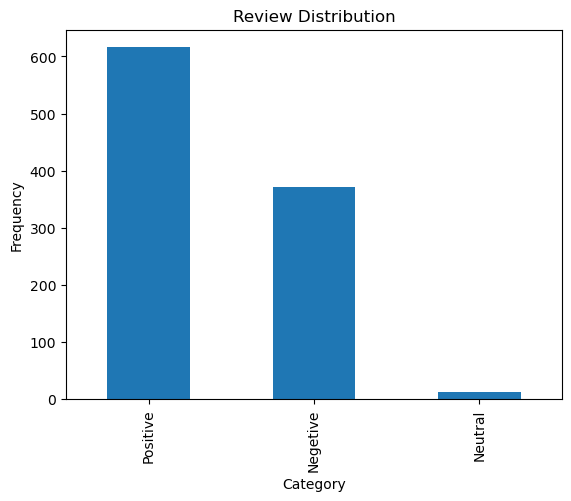

In [206]:
frequency=series.value_counts()
frequency.plot(kind='bar')
plt.title("Review Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Predictive modelling of customer booking

# EDA

In [274]:
model_df=pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")

In [275]:
model_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [276]:
model_df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [277]:
model_df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [278]:
model_df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [279]:
model_df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [280]:
model_df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [281]:
model_df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [282]:
model_df['flight_day']=model_df['flight_day'].replace({"Mon":1,"Tue":2,"Wed":3,"Thu":4,"Fri":5,"Sat":6,"Sun":7})

In [283]:
model_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [284]:
model_df['sales_channel']=model_df['sales_channel'].replace({"Mobile":1,"Internet":2})

In [285]:
model_df['trip_type']=model_df['trip_type'].replace({"RoundTrip":3,"OneWay":2,"CircleTrip":1})

In [286]:
##encoder=LabelEncoder()
#encode_booking=encoder.fit_transform(model_df['booking_origin'])

In [287]:
#model_df['origin_booking']=encode_booking

In [288]:
model_df.drop('route',axis=1,inplace=True)
model_df.drop('booking_origin',axis=1,inplace=True)

In [289]:
model_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,2,3,262,19,7,6,1,0,0,5.52,0
1,1,2,3,112,20,3,6,0,0,0,5.52,0
2,2,2,3,243,22,17,3,1,1,0,5.52,0
3,1,2,3,96,31,4,6,0,0,1,5.52,0
4,2,2,3,68,22,15,3,1,0,1,5.52,0


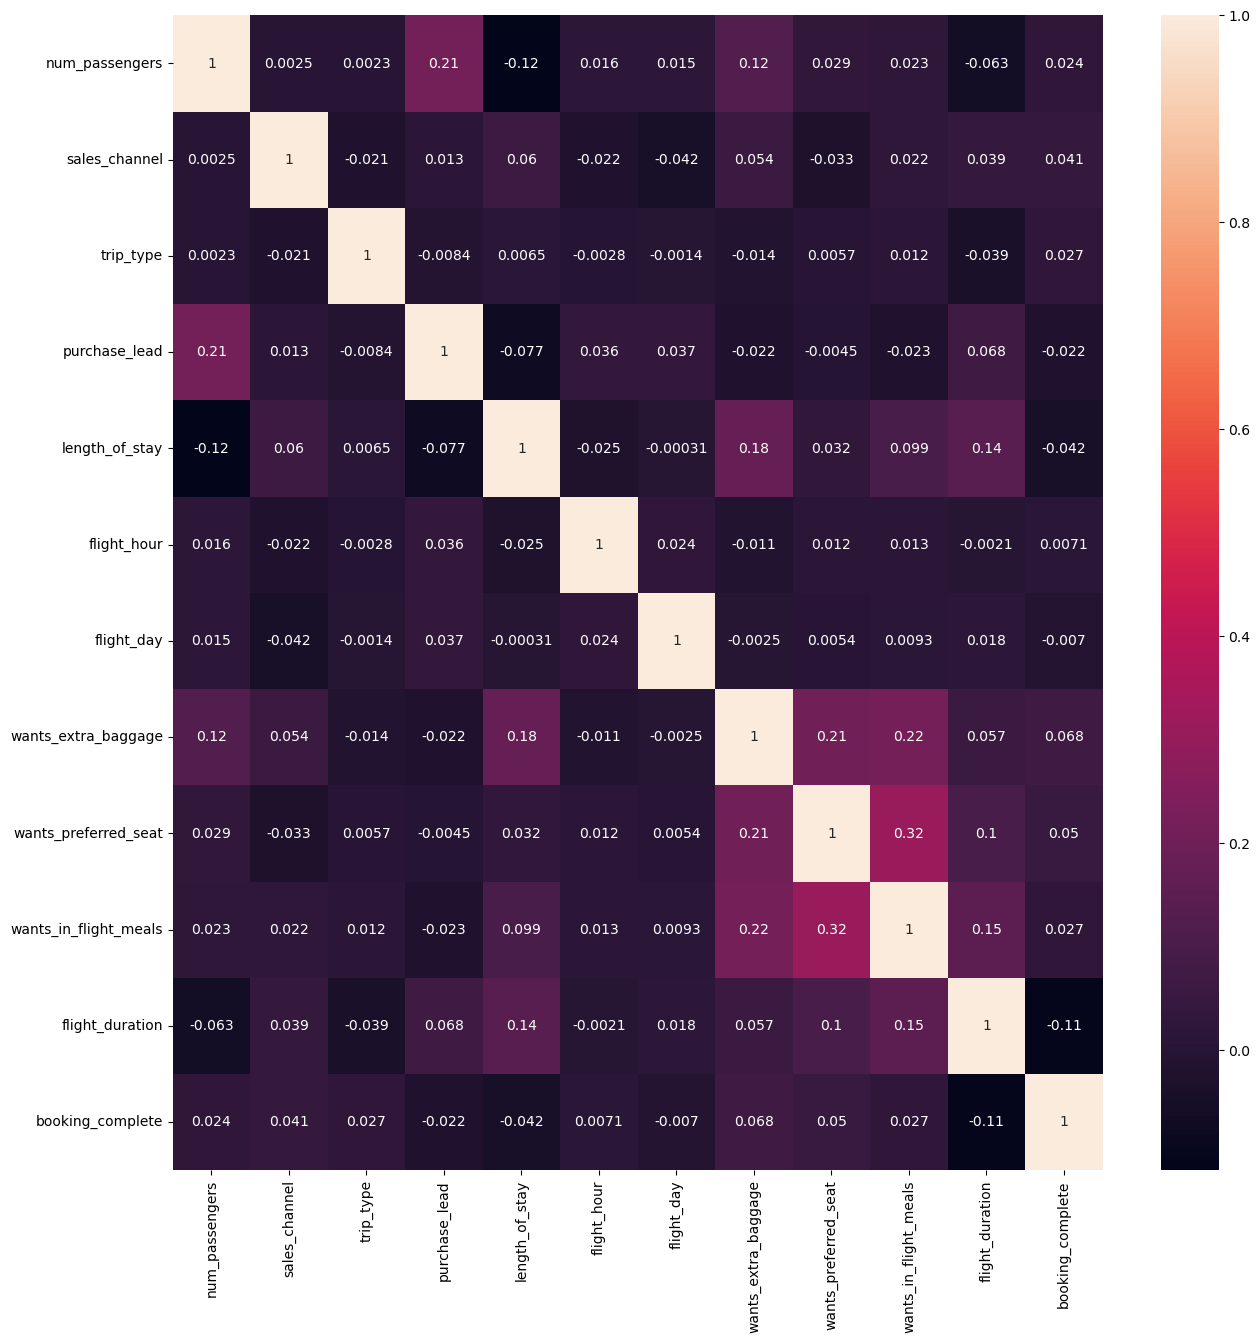

In [290]:
plt.figure(figsize=(15,15))
sns.heatmap(model_df.corr(),annot=True)
plt.show()

 No high correlation between variables

# Feature Importrance

In [298]:
x=model_df_scaled.drop('booking_complete',axis=1)
y=model_df_scaled['booking_complete']

In [299]:
print(x.shape)
print(y.shape)

(50000, 11)
(50000,)


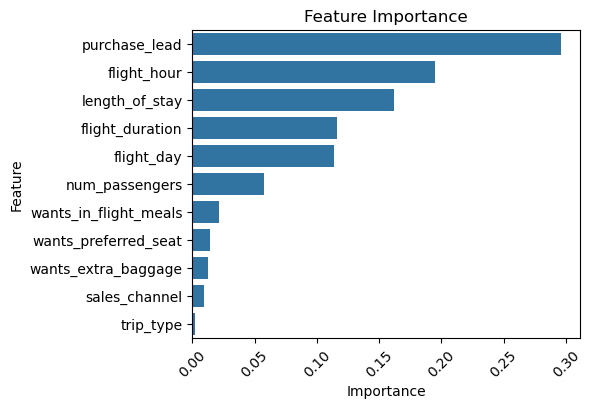

                  Feature  Importance
3           purchase_lead    0.296208
5             flight_hour    0.194611
4          length_of_stay    0.162182
10        flight_duration    0.115978
6              flight_day    0.113499
0          num_passengers    0.057280
9   wants_in_flight_meals    0.021749
8    wants_preferred_seat    0.014284
7     wants_extra_baggage    0.012757
1           sales_channel    0.009360
2               trip_type    0.002092


In [389]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x,y)
feature_importance=RF.feature_importances_
feature_importance=pd.DataFrame({'Feature':x.columns,'Importance':feature_importance})
feature_importance=feature_importance.sort_values(by='Importance' ,ascending=False)

plt.figure(figsize=(5,4))
sns.barplot(x='Importance',y='Feature',data=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

print(feature_importance)

In [301]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.125,1.0,1.0,0.302191,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983
1,0.000,1.0,1.0,0.129181,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983
2,0.125,1.0,1.0,0.280277,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983
3,0.000,1.0,1.0,0.110727,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983
4,0.125,1.0,1.0,0.078431,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983



# Model Creation

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Imbalanced Data

In [306]:
model_df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [307]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [308]:
y_smote.value_counts()

booking_complete
0    34002
1    34002
Name: count, dtype: int64

In [309]:
# RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier()
RF_classifier.fit(x_smote,y_smote)

RandomForestClassifier()

In [312]:

y_pred=RF_classifier.predict(x_test)

In [313]:
print(y_pred)

[0 0 0 ... 0 0 0]


# Classification Report

In [314]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8520
           1       0.31      0.14      0.19      1480

    accuracy                           0.83     10000
   macro avg       0.59      0.54      0.55     10000
weighted avg       0.78      0.83      0.80     10000

